In [1]:
import numpy as np
import pandas as pd

import utils.MAGic_Avocado_utils as magic

import matplotlib.pyplot as plt


import seaborn as sns

In [2]:
# Carga el dataset
df_orig = pd.read_csv("./dataset/avocado.csv")
df_orig

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# Copia del dataframe para preservar datos originales
df = df_orig.copy()

In [4]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['cat_region'] = df['region'].transform(lambda x: magic.get_truly_region(x))
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region


In [5]:
# Convierte 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Prepara filtro de filas para tener en cuenta sólo verdaderamente GreaterRegion
greater_regions = df[df['cat_region']=='GreaterRegion']
greater_regions.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California,GreaterRegion
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California,GreaterRegion
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California,GreaterRegion
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California,GreaterRegion
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California,GreaterRegion


### 4. **Análisis de Cohortes**
**Resumen:** El análisis de cohortes permite agrupar datos según características específicas y observar cómo se comportan a lo largo del tiempo. Se centra en cohortes de precios y ventas para entender las dinámicas del mercado.

1. **Cohortes Basadas en Precios Promedios Trimestrales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.

In [22]:
#Cogemos las columnas que necesitaremos
cols_cohorte_trim=greater_regions[['AveragePrice', 'Total Volume', 'Date']]

#Las agrupamos por trimestres (Q) y para average price hacemos la media y para total volume la suma
cohorte_trim=cols_cohorte_trim.groupby(pd.Grouper(key='Date', freq='Q')).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
})

/tmp/ipykernel_171244/1071669904.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cohorte_trim=cols_cohorte_trim.groupby(pd.Grouper(key='Date', freq='Q')).agg({


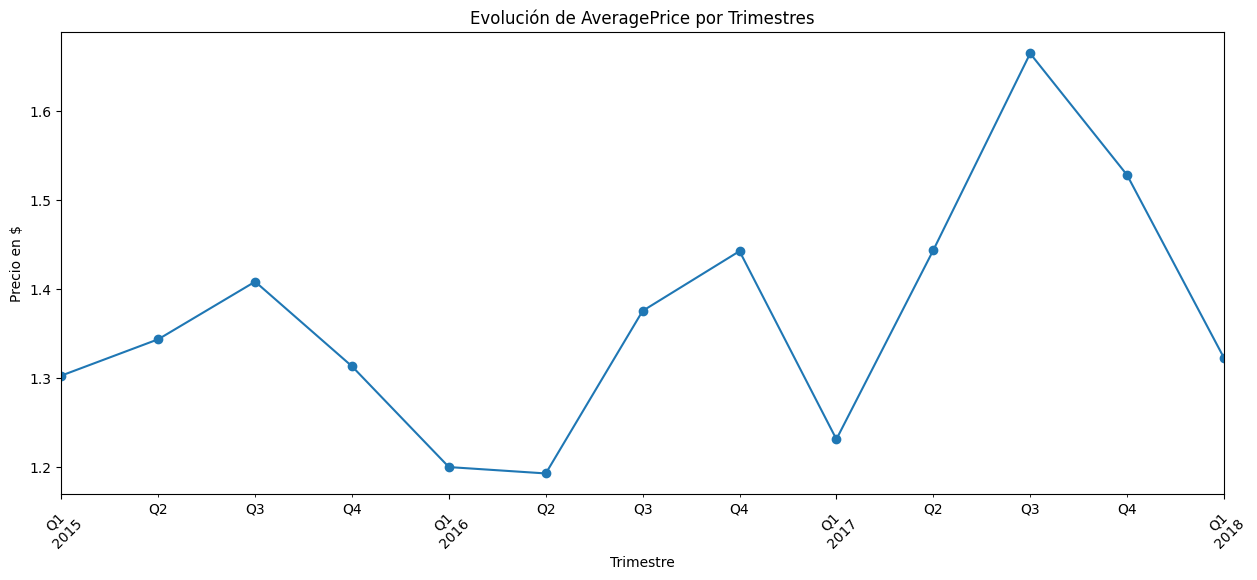

In [23]:
#Visualizar los resultados que muestra evolución de las cohortes
plt.figure(figsize=(15,6))
cohorte_trim['AveragePrice'].plot(marker='o')
plt.title('Evolución de AveragePrice por Trimestres')
plt.xlabel('Trimestre')
plt.ylabel('Precio en $')
plt.xticks(rotation=45)
plt.show()


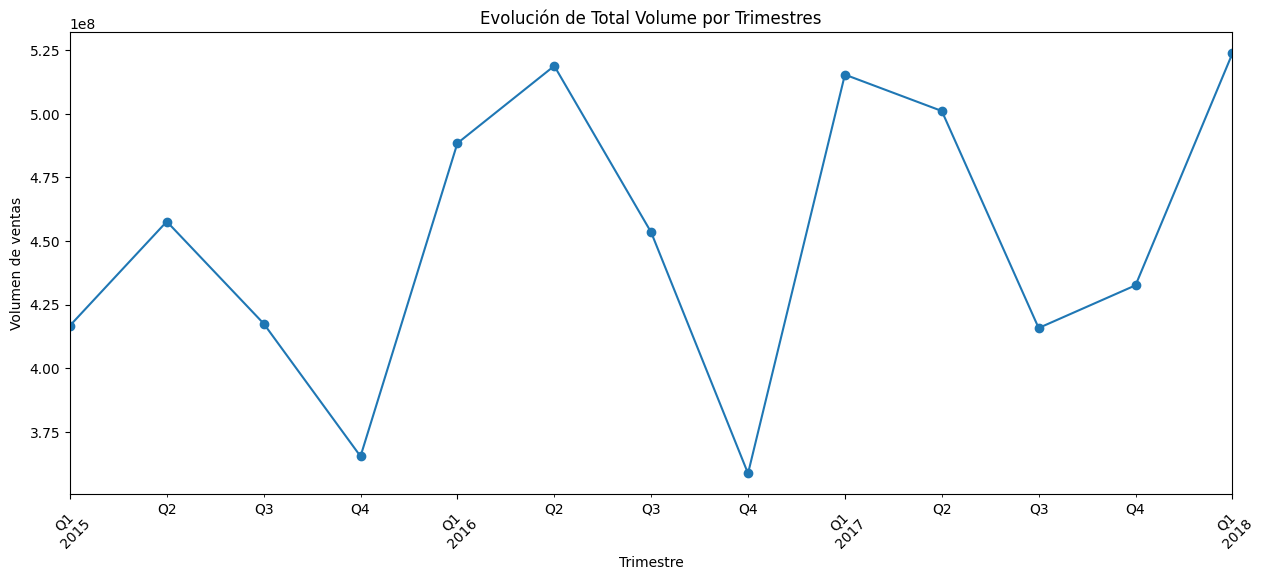

In [25]:
#Visualizar los resultados que muestra evolución de las cohortes
plt.figure(figsize=(15,6))
cohorte_trim['Total Volume'].plot(marker='o')
plt.title('Evolución de Total Volume por Trimestres')
plt.xlabel('Trimestre')
plt.ylabel('Volumen de ventas')
plt.xticks(rotation=45)
plt.show()


Hemos separado los resultados en dos gráficas distintas dado que las magnitudes de las variables eran muy diferentes. 
Para Total Volume estamos hablando de cantidades alrededor de 1.2e9
Para AveragePrice estamos hablando de cantidades alrededor de 1.5

2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.

In [75]:
# Agregar una columna para el año_trimestre
greater_regions2=greater_regions.copy()
greater_regions2['quarter'] = greater_regions['Date'].dt.to_period('Q')


cohorte_reg_fecha_AP= greater_regions2.groupby(['quarter', 'region'])['AveragePrice'].mean().unstack()

# Mostrar el DataFrame resultante
cohorte_reg_fecha_AP.head()

region,California,GreatLakes,Midsouth,Northeast,Plains,SouthCentral,Southeast,West
quarter,,,,,,,,
2015Q1,1.149231,1.349615,1.349231,1.554231,1.381538,1.079231,1.378846,1.184231
2015Q2,1.291923,1.308462,1.310000,1.613462,1.474615,1.091154,1.426154,1.236923
2015Q3,1.516154,1.343462,1.392308,1.594231,1.484231,1.129231,1.447692,1.363077
2015Q4,1.306154,1.303462,1.353846,1.413077,1.411154,1.148462,1.406154,1.166923
2016Q1,1.132692,1.194615,1.262308,1.446923,1.265000,1.047308,1.261923,0.993077


In [93]:
#Hacemos lo mismo para el TotalVolume
cohorte_reg_fecha_TV= greater_regions2.groupby(['quarter', 'region'])['Total Volume'].sum().unstack()

#estoy calculando la sum para TotalVolume a pesar q en el enunciado dice hacer la mean pero creo q tiene más sentido la suma!!

# Mostrar el DataFrame resultante
cohorte_reg_fecha_TV.head()

region,California,GreatLakes,Midsouth,Northeast,Plains,SouthCentral,Southeast,West
quarter,,,,,,,,
2015Q1,79895346.68,42619772.04,34698796.39,45756467.79,22196876.60,73726229.56,39625914.71,78194865.91
2015Q2,80600802.72,46251667.67,39153152.44,55974941.92,25866752.37,80968220.52,45322832.05,83470364.51
2015Q3,73234060.50,43750037.96,36526334.69,54383296.46,22069418.29,72584454.74,40422799.70,74568100.66
2015Q4,67677223.21,36766497.48,29843632.92,47264279.51,17505743.47,63175689.17,34723662.60,68436988.55
2016Q1,90588184.56,47412925.25,41043619.49,60937885.37,24486964.99,77137160.25,50421113.86,96344081.79


<Figure size 8000x800 with 0 Axes>

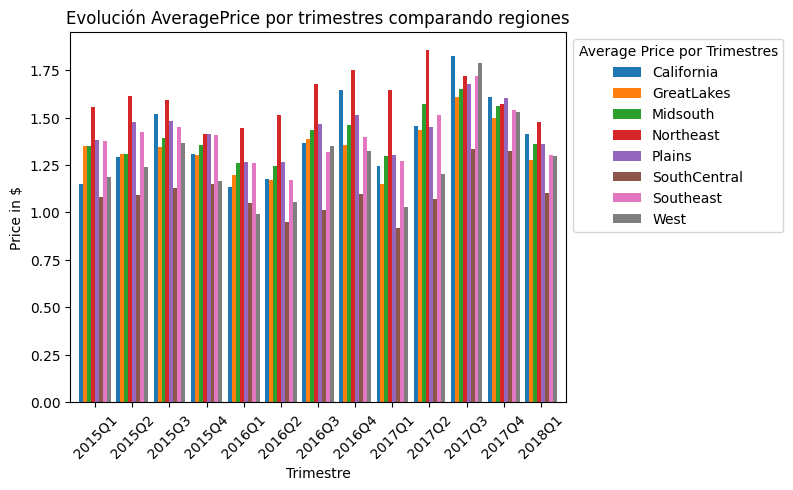

In [82]:
plt.figure(figsize=(80,8))
cohorte_reg_fecha_AP.plot(kind="bar", width=0.85)
plt.xticks(rotation=45)
plt.title("Evolución AveragePrice por trimestres comparando regiones")
plt.xlabel("Trimestre")
plt.ylabel("Price in $")
plt.legend(title='Average Price por Trimestres', loc='upper left', bbox_to_anchor=(1, 1))

<Figure size 8000x800 with 0 Axes>

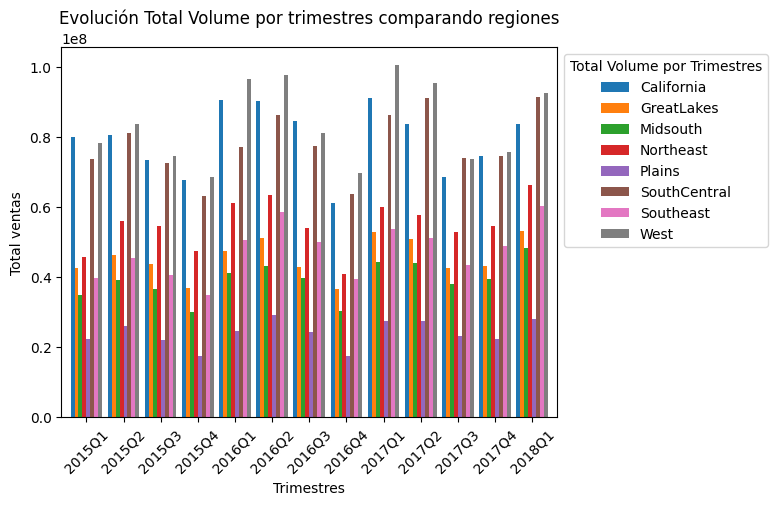

In [88]:
plt.figure(figsize=(80,8))
cohorte_reg_fecha_TV.plot(kind="bar", width=0.85)
plt.xticks(rotation=45)
plt.title("Evolución Total Volume por trimestres comparando regiones")
plt.xlabel("Trimestres")
plt.ylabel("Total ventas")
plt.legend(title='Total Volume por Trimestres', loc='upper left', bbox_to_anchor=(1, 1))

3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.

4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.

5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.